In [1]:
import warnings
# Deshabilitar todos los warnings
warnings.filterwarnings("ignore")
    
import pandas as pd
from sklearn.model_selection import train_test_split
# Se carga el archivo de datos ya pre-procesado
df = pd.read_csv("./data/datosv2_clean.csv")
columnas_a_convertir = ['ID_UC_PHASE', 'ID_REGION', 'ID_UC_METER_TYPE', 'ID_UC_CLASS', 'ID_LOCALITY', 'ID_UC_READING_CYCLE', 'ID_MUNICIPALITY', 'UC_COL_ID_03']
df[columnas_a_convertir] = df[columnas_a_convertir].astype(object)

from sklearn.preprocessing import OneHotEncoder
# Inicializar el codificador
encoder = OneHotEncoder(sparse=False)
# Ajustar y transformar la variable categórica
encoded_data = encoder.fit_transform(df[['UC_COL_ID_05']])
# Crear un nuevo DataFrame con las columnas one-hot
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['UC_COL_ID_05']))
# Concatenar el nuevo DataFrame con el original
df = pd.concat([df, df_encoded], axis=1)
# Eliminar la columna original si es necesario
df = df.drop(['UC_COL_ID_05'], axis=1)

# Guarda las etiquetas en un objeto de la serie Pandas
y = df['RESULTADO']
# Se borrra la etiqueta
X = df.drop("Unnamed: 0",axis=1)
X = X.drop("RESULTADO",axis=1)
# Aplicar one-hot encoding con get_dummies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Implementación modelo usando *Sklearn*


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Definición de modelo Random Forest para un problema de clasificación
clf_1 = RandomForestClassifier()
clf_1.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
#Impresión de desempeño del modelo
y_pred1 = clf_1.predict(X_test)

# RMSE
clf_1_RMSE = mean_squared_error(y_test, y_pred1, squared=False)
print("RMSE: %.3f" %clf_1_RMSE )
# MAE
clf_1_MAE = mean_absolute_error(y_test, y_pred1)
print("MAE: %.3f" %clf_1_MAE )

RMSE: 1.428
MAE: 0.679


In [3]:
cross_val_score(clf, X, y, cv=5)

array([0.7301021 , 0.7217985 , 0.74308033, 0.72961004, 0.5609276 ])

## Calibración de parámetros

In [4]:
# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 310, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
accuracy_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

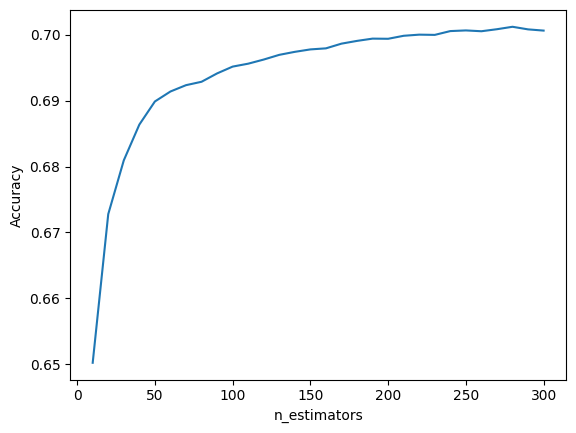

In [6]:
import matplotlib.pyplot as plt
# Gráfica del desempeño del modelo vs la cantidad de n_estimators
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [18]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, 22, 3)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=100, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

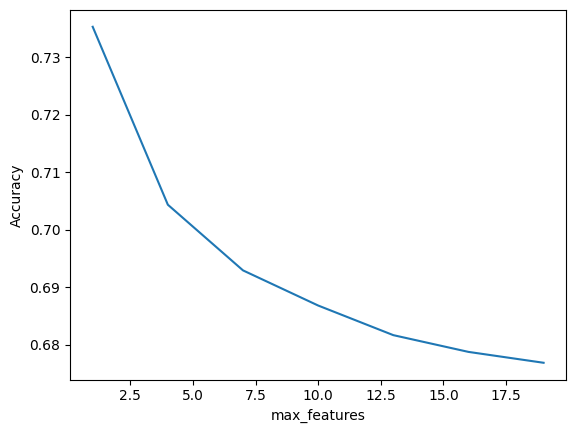

In [19]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [20]:
# Creación de lista de valores para iterar sobre diferentes valores de max_features
depth_range = range(1, 11)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for depth in depth_range:
    clf = RandomForestClassifier(n_estimators=100, max_features=4, max_depth=depth,random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

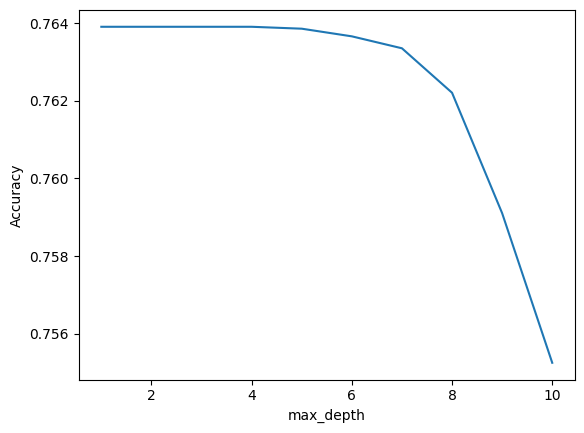

In [21]:
# Gráfica del desempeño del modelo vs la cantidad de max_depth
plt.plot(depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [22]:
# Definición del modelo con los parámetros calibrados
crrf = RandomForestClassifier(n_estimators=100, max_features=4, max_depth=5, random_state=1, n_jobs=-1)
crrf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_jobs=-1, random_state=1)

In [25]:
from sklearn.metrics import mean_squared_error

predictions = crrf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

2.060401033337434


In [31]:
#Impresión de desempeño del modelo
y_pred2 = crrf.predict(X_test)

# RMSE
crrf_RMSE = mean_squared_error(y_test, y_pred2, squared=False)
print("RMSE: %.3f" %crrf_RMSE )
# MAE
crrf_MAE = mean_absolute_error(y_test, y_pred2)
print("MAE: %.3f" %crrf_MAE )

RMSE: 1.435
MAE: 0.687
